# ML project

# Library import, etc

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

np.random.seed(1)

In [444]:
import sklearn
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
%matplotlib inline

In [445]:
DoNormalization = 'y' # input('Enter your input to do standardization (Y or N):')      # If you use Python 3

In [446]:
if 0:
    corr_thre = input('input corr_thre(default:0.4)')
    corr_thre = float(corr_thre)
    DoNormalization = 'y'  # input('Enter your input to do standardization (Y or N):')      # If you use Python 3
    DoMultiColEnh = 'n' # input('Enter your input to enhance multi colinearity (Y or N):')      # If you use Python 3
    if (DoMultiColEnh =='y' or DoMultiColEnh =='Y'):
        MultiCol_R2_thre = input('Enter R2 threshold to enhance multicolinearity(0-1):')
        MultiCol_R2_thre = float(MultiCol_R2_thre)    
    UseBicAicOverwrite = input('Overwite by using feature list found by Aic or Aic:(y or n)/')      # If you use Python 3
    if( UseBicAicOverwrite =='y' or UseBicAicOverwrite  =='Y'):
        UseBicAicOverwriteChoice = input('1(forwardAIC), 2(backwardAIC), 3(bothAIC.empty), 4(bothAIC.full),\
        5(forwardBIC), 6(backwardBIC), 7(bothBIC.empty), 8(bothBIC.full) ')
        UseBicAicOverwriteChoice = int(UseBicAicOverwriteChoice)   
    OutlierFactor = input('Enter outlier factor(default 5, 4 to remove more, 6 to remove less)')
    OutlierFactor = int(OutlierFactor)    

In [447]:
N_folds = 7 # input('Enter # of folds for cross validation(ex:3,5,y=7,etc)')
N_folds = int(N_folds)

In [448]:
ModelNum = input('1(inputA~score), 2(inputB~score), 3(inputC~score), \
4(inputA~Msyndrome), 5(inputB~Msyndrome), 6(inputC~Msyndrome), arbitrary integer(otherwise) ')

ModelNum = int(ModelNum)

1(inputA~score), 2(inputB~score), 3(inputC~score), 4(inputA~Msyndrome), 5(inputB~Msyndrome), 6(inputC~Msyndrome), arbitrary integer(otherwise) 7


In [449]:
DoBalanceY = input('Enter y if want to resolve output unbalance proble ')

if DoBalanceY=='y' or DoBalanceY=='Y':
    BalanceRatio = input('Enter Class Balance Ratio(0~1): ')
    BalanceRatio = float(BalanceRatio)
    SMOTEorADASYN = input('Enter 1 for SMOTE, 2 for ADASYN, 3 for random under sampler, 4 for hybrid, 5 for SMOTEthanUndersampler, 6 for ADASYNandUndersampler')
    SMOTEorADASYN = int(SMOTEorADASYN)

Enter y if want to resolve output unbalance proble y
Enter Class Balance Ratio(0~1): 0.8
Enter 1 for SMOTE, 2 for ADASYN, 3 for random under sampler, 4 for hybrid, 5 for SMOTEthanUndersampler, 6 for ADASYNandUndersampler5


In [450]:
scoring_crit = input('1:accuracy, 2:f1, 3: balanced_accuracy, 4: f1_weighted, 5: precision, 6:recall   ')
if scoring_crit=='1':
    scoring_crit = 'accuracy'
elif scoring_crit=='2':
    scoring_crit = 'f1'
elif scoring_crit == '3':
    scoring_crit = 'balanced_accuracy'
elif scoring_crit == '4':
    scoring_crit =  'f1_weighted'   
elif scoring_crit == '5':
    scoring_crit =  'precision'   
elif scoring_crit == '6':    
    scoring_crit = 'recall'    

1:accuracy, 2:f1, 3: balanced_accuracy, 4: f1_weighted, 5: precision, 6:recall   2


In [451]:
test_size = float( input('Enter test_size(0~1):') )

Enter test_size(0~1):0.3


In [452]:
if (DoNormalization=='Y' or DoNormalization=='y'):
    scaleType_choice = int( input('Enter 1 for standard, 2 for minmax, 3 for maxabs'))
    if scaleType_choice==1:
        scaleType = 'standard'
    elif scaleType_choice==2:
        scaleType = 'minmax'
    elif scaleType_choice==3:
        scaleType = 'maxabs'

Enter 1 for standard, 2 for minmax, 3 for maxabs1


In [453]:
Do_ML = int(input('To do Multiple linear regression/classition, enter 1: '))
Do_RF = int(input('To do random forest regression/classition, enter 1: '))
if Do_RF ==1:
    RF_grid_choice = int(input('RF grid choice, 1 for full test, 2 for simplified test: '))
Do_KNN = int(input('To do KNN regression/classition, enter 1: '))
Do_LogReg = int(input('To do LogReg, enter 1: '))

To do Multiple linear regression/classition, enter 1: 2
To do random forest regression/classition, enter 1: 2
To do KNN regression/classition, enter 1: 2
To do LogReg, enter 1: 2


In [454]:
DoKmeansCluster = int(input('Enter 1 to do Kmeans clustering, 2 not to: '))

if DoKmeansCluster == 1:
    Kmeans_cl_size = int( input('Enter n_clusters for Kmeans clustering: ') )

Enter 1 to do Kmeans clustering, 2 not to: 2


# Data Import

In [455]:
df = pd.read_csv('nonobese_final.csv', index_col=0, header = 1)

In [456]:
df.head(5)

,age,sex,smoking,exercise,alchol,hypertension,Diabetes,Height,Weight,BMI,Metscore,Metasyn
mask_id,,,,,,,,,,,,
GC15A1321697346,30,1,0,0,1,0,0,168.7,33.4,11.7,1,0
GC15A4343291374,67,0,0,0,0,0,0,163.0,35.3,13.3,2,0
GC15A4394818517,48,1,0,1,0,0,0,161.9,35.4,13.5,1,0
GC15A8349319917,43,1,0,0,0,0,0,162.4,36.4,13.8,1,0
GC15A6338225107,55,1,0,0,0,0,0,153.4,33.1,14.1,1,0


In [457]:
df.columns

Index(['age', 'sex', 'smoking', 'exercise', 'alchol', 'hypertension',
       'Diabetes', 'Height', 'Weight', 'BMI', 'Metscore', 'Metasyn'],
      dtype='object')

In [458]:
# data procesing 1
# df.columns = df.iloc[0,:] # age sex, .. info will be used as column names 
# df = df.iloc[1:,] # first line from top is now removed

In [459]:
df.dtypes

age               int64
sex               int64
smoking           int64
exercise          int64
alchol            int64
hypertension      int64
Diabetes          int64
Height          float64
Weight          float64
BMI             float64
Metscore          int64
Metasyn           int64
dtype: object

In [460]:
print(df.shape)

(58380, 12)


In [461]:
n_unique =df.nunique() 
null_perc = df.isnull().sum()/df.shape[0]*100
NA_perc = df.isnull().sum()/df.shape[0]*100

df_info = pd.DataFrame({'n_unique': n_unique, 'null_perc': null_perc, 'NA_perc': NA_perc})
df_info["dtyp"]=""
df_info["iotyp"]=""

In [462]:
for r_i in range(0, df_info.shape[0] ):
    if df_info['n_unique'][r_i] >=10:
        df_info['dtyp'][r_i] = 'numeric'
    elif df_info['n_unique'][r_i] ==2: 
        df_info['dtyp'][r_i] = 'nominal'
    else:
        df_info['dtyp'][r_i] = 'ordinal'
        
    if (df_info.index[r_i]=='Metscore' or df_info.index[r_i]=='Metasyn'):
        df_info["iotyp"][r_i]='oup'
    else:
        df_info["iotyp"][r_i]='inp'

In [463]:
df.columns

Index(['age', 'sex', 'smoking', 'exercise', 'alchol', 'hypertension',
       'Diabetes', 'Height', 'Weight', 'BMI', 'Metscore', 'Metasyn'],
      dtype='object')

In [464]:
df['Metasyn'].value_counts()

0    49197
1     9183
Name: Metasyn, dtype: int64

# EDA: numeric predictors' histogram ############

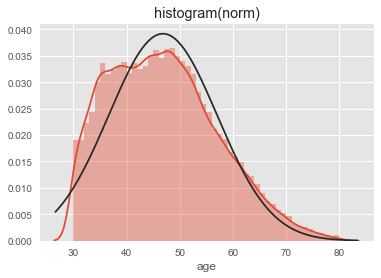

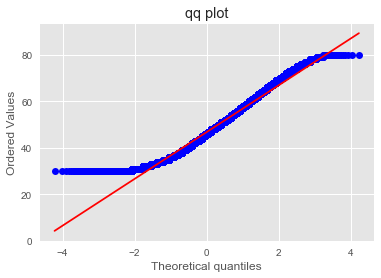

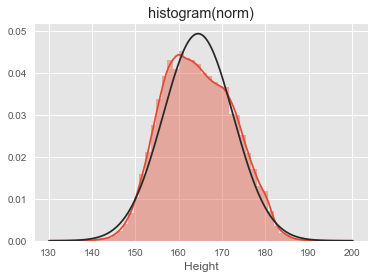

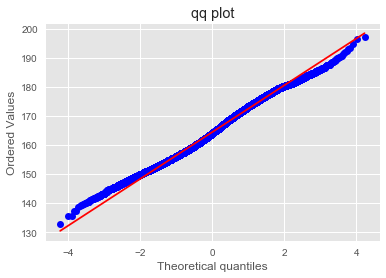

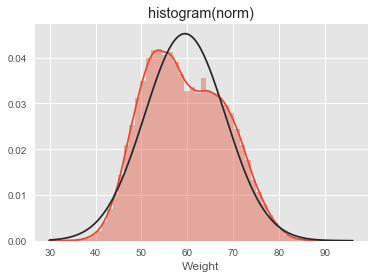

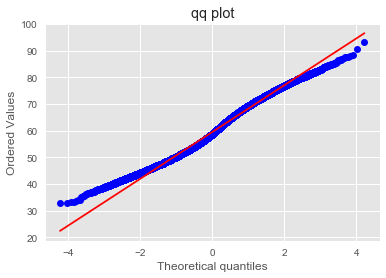

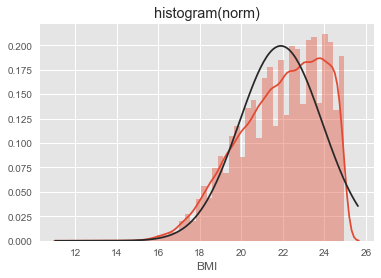

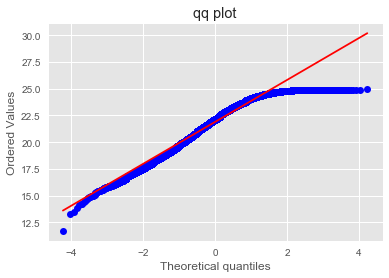

In [465]:
for c_i in range(0, len(df.columns) ):
    if (df_info.loc[df.columns[c_i], 'dtyp']=="numeric"):
        # imp_avg = df[df.columns[c_i]].mean()
        imp_avg = df.iloc[:, c_i].mean()
        
        temp = df.iloc[:,c_i].fillna(imp_avg)
        
        fig = plt.figure()
        sns.distplot( temp , fit=norm)
        plt.title('histogram(norm)')
     
        fig = plt.figure()
        res = stats.probplot( temp, plot=plt)
        plt.title('qq plot')
        # 

# EDA: numeric predictors vs. Metscore, scatterplot ############

In [466]:
if 0:
    for c_i in range(0, len(df.columns) ):
        if (df_info.loc[df.columns[c_i], 'dtyp']=="numeric"):
            imp_avg = df[df.columns[c_i]].mean()

            fig = plt.figure()
            plt.scatter( df[df.columns[c_i]].fillna(imp_avg), df['Metscore'].fillna(imp_avg) );
            plt.xlabel(df.columns[c_i])
            plt.ylabel('Metscore')


# EDA: Metscore(x) vs. numeric predictors(y), boxplot

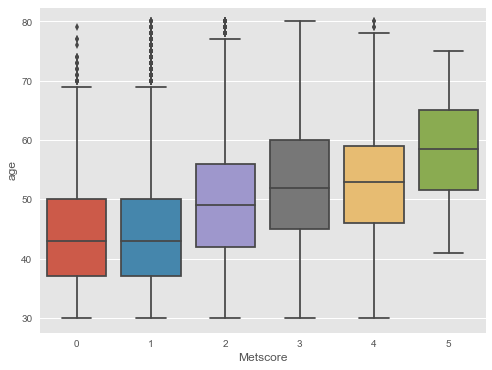

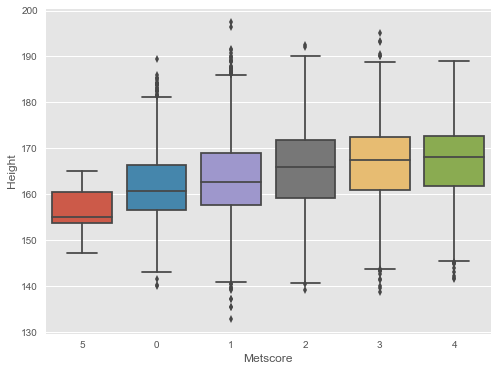

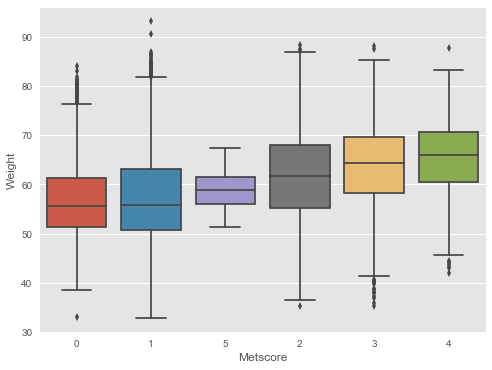

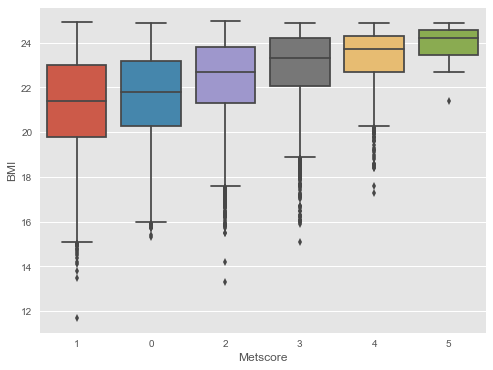

In [467]:
spear_cor_nume_Mets = []
spear_cor_nume_Mets_p = []
pred_ind = []

for c_i in range(0, len(df.columns) ):
    if (df_info.loc[df.columns[c_i], 'dtyp']=="numeric"):
        imp_x = df['Metscore'].median() # since ordinal 
        imp_y = df.iloc[:, c_i].mean() # numeric's mean 
        
        x = df['Metscore'].fillna(imp_x)
        y = df.iloc[:,c_i].fillna(imp_y)
        xy = pd.concat([x,y], axis=1)
        
        aa,bb= stats.spearmanr(x,y) 
        spear_cor_nume_Mets.append(aa)
        spear_cor_nume_Mets_p.append(bb)
        pred_ind.append( df.columns[c_i] )        
        
        odr =xy.groupby(['Metscore']).agg( {df.columns[c_i]:['median']} )
        odr.columns = odr.columns.droplevel(0)
        odr = odr.sort_values('median')
 
        f, ax = plt.subplots(figsize=(8, 6))
        fig = sns.boxplot(x=x, y=y, data=xy, order = odr.index)          

In [468]:
# test codes

c_i = 0


# EDA: Metscore(x) vs. categorical predictors(y), boxplot
In [206]:


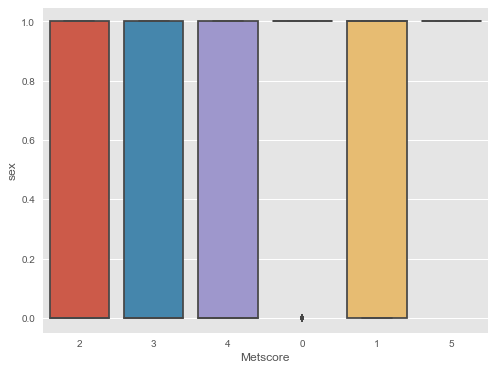

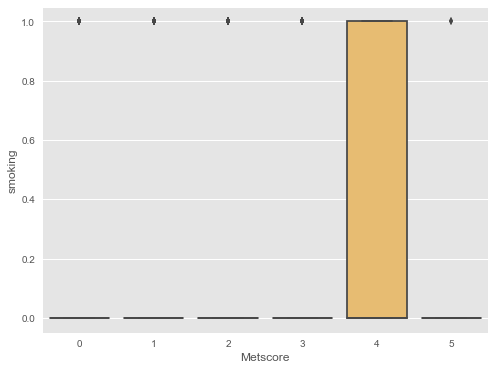

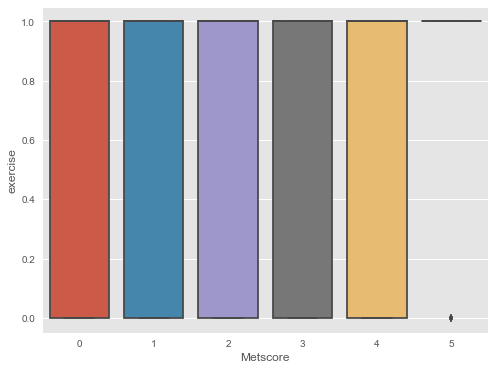

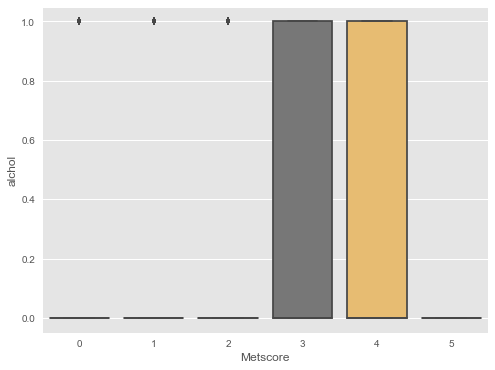

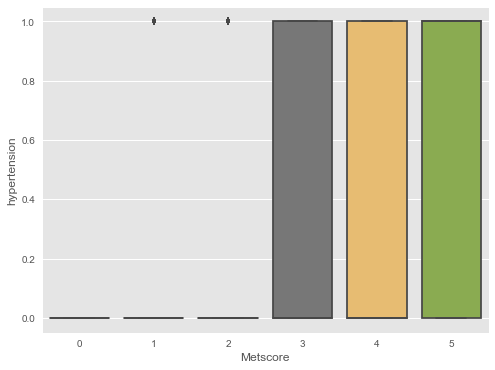

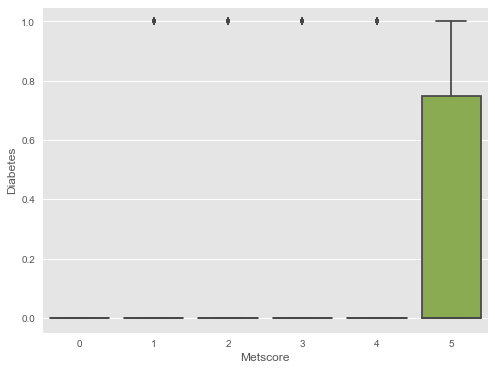

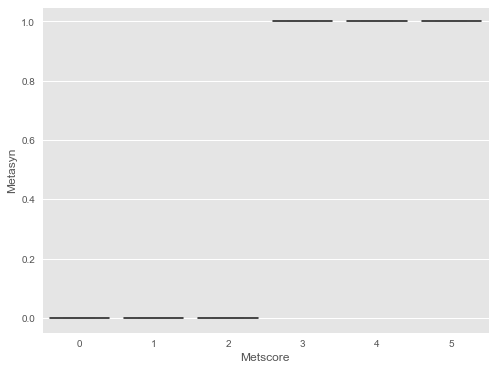

In [469]:
for c_i in range(0, len(df.columns) ):
    if (df_info.loc[df.columns[c_i], 'dtyp']=="ordinal" or df_info.loc[df.columns[c_i], 'dtyp']=="nominal"):
        if  (df.columns[c_i]!='Metscore'):
            imp_x = df['Metscore'].median() # since ordinal 
            imp_y = df.iloc[:, c_i].mean() # numeric's mean 

            x = df['Metscore'].fillna(imp_x)
            y = df.iloc[:,c_i].fillna(imp_y)
            xy = pd.concat([x,y], axis=1)

            odr =xy.groupby(['Metscore']).agg( {df.columns[c_i]:['median']} )
            odr.columns = odr.columns.droplevel(0)
            odr = odr.sort_values('median')

            f, ax = plt.subplots(figsize=(8, 6))
            fig = sns.boxplot(x=x, y=y, data=xy, order = odr.index)          

# EDA: Numeric predictor's correlation matrix

In [470]:
# correlation matrix
if 0:
    corrmat = traindata[numeric_df.Name].corr(method='pearson')
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=1.0, square=True);

In [471]:
if 0: 
    corrmat

In [472]:
# corrmat.to_csv('./data/corrmat.csv')

# Numeric predictors showing correlation (with SalePrice) larger than threshold selected

In [473]:
if 0:
    cond= abs(corrmat.SalePrice) >=corr_thre

    num_pred_thre_list= corrmat[cond].index.tolist()
    print(num_pred_thre_list)

In [474]:
# traindata_nom_ord = traindata[nominal_df.iloc[:,0]]

In [475]:
# pd.crosstab( traindata_nom_ord.iloc[:,0],traindata_nom_ord.iloc[:,1] )

In [476]:
# traindata.to_csv("./data/traindata_smpl.csv")  

# Spearson correlation, Metscore(ord) vs. numeric predictors

Text(0, 0.5, 'Spearman corr with Metscore')

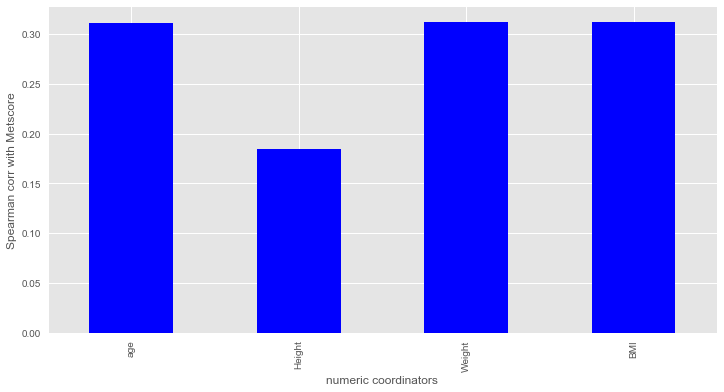

In [477]:
# correlation, nominal(coverted to ordinal) vs. saleprice

df_corr = pd.DataFrame( list(zip(spear_cor_nume_Mets, spear_cor_nume_Mets_p)), index = pred_ind, columns =['corr', 'pvalue'])
plt.figure(figsize=(12,6))
df_corr['corr'].plot.bar(color='b')
plt.xlabel('numeric coordinators')
plt.ylabel('Spearman corr with Metscore')

# Imputation on test(shortened) data. Imputation on training(shortened) data is not needed. 

In [478]:
# from fancyimpute import KNN

In [479]:
if 0:
    if 'MSZoning' in testdata_sh.columns:
        imp_med = testdata_sh.MSZoning.median()
        testdata_sh.MSZoning = testdata_sh.MSZoning.fillna(imp_med)

    if 'Exterior1st' in testdata_sh.columns:
        imp_med = testdata_sh.Exterior1st.median()
        testdata_sh.Exterior1st = testdata_sh.Exterior1st.fillna(imp_med)

    if 'Exterior2nd' in testdata_sh.columns:    
        imp_med = testdata_sh.Exterior2nd.median()
        testdata_sh.Exterior2nd = testdata_sh.Exterior2nd.fillna(imp_med)

    if 'GarageYrBlt' in testdata_sh.columns:     
        imp_mean = testdata_sh.GarageYrBlt.mean()
        # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.GarageYrBlt) 
        testdata_sh.GarageYrBlt = testdata_sh.GarageYrBlt.fillna(imp_mean)

    if 'TotalBsmtSF' in testdata_sh.columns:     
        imp_mean = testdata_sh.TotalBsmtSF.mean()
        # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.TotalBsmtSF) 
        testdata_sh.TotalBsmtSF = testdata_sh.TotalBsmtSF.fillna(imp_mean)

    if 'GarageCars' in testdata_sh.columns:     
        imp_mean = testdata_sh.GarageCars.mean()
        # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.GarageCars) 
        testdata_sh.GarageCars = testdata_sh.GarageCars.fillna(imp_mean)

    if 'GarageArea' in testdata_sh.columns:     
        imp_mean = testdata_sh.GarageArea.mean()
        # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.GarageArea) 
        testdata_sh.GarageArea = testdata_sh.GarageArea.fillna(imp_mean)

    if 'MasVnrArea' in testdata_sh.columns:     
        imp_mean = testdata_sh.MasVnrArea.mean()
        # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.MasVnrArea) 
        testdata_sh.MasVnrArea = testdata_sh.MasVnrArea.fillna(imp_mean)

# Outlier removed

In [480]:
if 0:
    for cname in traindata_sh.columns:
        if (cname in numeric_df.values) and (cname != 'SalePrice'):
            traindata_sh = traindata_sh[np.abs(traindata_sh[cname]-traindata_sh[cname].mean()) <= (OutlierFactor*traindata_sh[cname].std())]

In [481]:
 if 0:
    n_unique =testdata_sh.nunique() 
    null_perc = testdata_sh.isnull().sum()/testdata_sh.shape[0]*100
    NA_perc = testdata_sh.isnull().sum()/testdata_sh.shape[0]*100

    testdata_sh_analysis = pd.DataFrame({'n_unique': n_unique, 'null_perc': null_perc, 'NA_perc': NA_perc})

    testdata_sh_analysis[NA_perc>0]

    x1 = traindata_sh[comb_list] # excluded SalePrice
    y1 = traindata_sh.SalePrice  

    x2= testdata_sh[comb_list] # we do not have SalePrice of the test data 

# Perform data standardization on numeric predictors

In [482]:
if (DoNormalization=='Y' or DoNormalization=='y'):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 
    import statsmodels.api as sm 

   
    if scaleType not in ['standard', 'minmax', 'maxabs']: 
        raise ValueError('%s is not a valid choice' %(scaleType))
    if scaleType == 'standard':
        scaler = StandardScaler()
    elif scaleType == 'minmax':
        scaler = MinMaxScaler()
    elif scaleType == 'maxabs':
        scaler = MaxAbsScaler()
        
    setA = set( df_info.loc[df_info['iotyp']=='inp'].index ) 
    setB = set( df_info.loc[df_info['dtyp']=='numeric'].index )
    nume_list = list( setA & setB)
    
    # part of x1 extracted for normalization
    scaler.fit( df[nume_list] ) # only numerical predictors, except for SalePrice, is input
                        # Fix the scale model using the train set
    
    df[nume_list] = scaler.transform(df[nume_list])     
# end of if (DoNormalization=='Y' or DoNormalization=='y'):    
    

# df subselected. Also y1/y2 created by subselection 
if ModelNum == 1:   # inputA~score
    print('codes needed, 1000')
elif ModelNum == 2: # inputB~score
    print('codes needed, 1001')
elif ModelNum == 3: # inputC~score
    print('codes needed, 1002')
elif ModelNum == 4: # inputA~Msyndrome, select and deselect
    x = df[['age', 'sex', 'smoking', 'alchol', 'exercise', 'BMI']]
elif ModelNum == 5: # inputB~Msyndrome, select and deselect
    x = df[['age', 'sex', 'smoking', 'alchol', 'exercise', 'Height', 'Weight']]
elif ModelNum == 6: # inputC~Msyndrome, select and deselct
    x = df[['age', 'sex', 'smoking', 'alchol', 'exercise', 'BMI', 'Height', 'Weight']]
else:
    # At least, Metscore and Metashn sh be further removed
    # Note) drop is mutating. Thus, copy() is needed. 
    x = df.copy()
    x.drop(['Metscore', 'Metasyn'], axis=1, inplace=True)
    
y1 = df['Metscore']
y2 = df['Metasyn']
y  = df[['Metscore', 'Metasyn']] # common 



In [483]:
# traindata_sh.to_csv('./data/traindata_smpl_sh_std.csv')

In [484]:
# traindata_smpl_std.to_csv('./data/traindata_smpl_std.csv')

# MLR (Multiple Linear Regression)

In [485]:
if Do_ML==1:
    from sklearn import linear_model
    ols = linear_model.LinearRegression()
    ols.fit(x1, y1)
    print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
    print("beta_0: " + str(np.round(ols.intercept_, 3)))
    print("RSS: %.2f" % np.sum((ols.predict(x1) - y1) ** 2))
    print("R^2: %.5f" % ols.score(x1, y1))

    comp_metric_tr = np.sqrt(   np.mean(  (y1 - ols.predict(x1))**2  )   )
    print(comp_metric_tr)

# MLR (Multiple Linear Regression with CV

In [486]:
if Do_ML==1:
    # import sklearn.cross_validation as cv
    import sklearn.model_selection as ms

    # import sklearn.cross_validation as cv

    # cv_k3s = cv.StratifiedKFold(y1, n_folds=N_folds)
    ms_k3 = ms.KFold(n_splits=N_folds)
    # cv_k3 = cv.KFold(len(y1), n_folds=N_folds)

    comp_metric_tr = []
    comp_metric_val = []
    n_tr = []
    n_val = []
    RSS_tr = []
    RSS_val = []
    R2_tr = []
    R2_val = []

    ols = linear_model.LinearRegression()

    # for train_idx, val_idx in cv_k3:
    for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
        ols.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
        n_tr.append( len(train_idx) )
        n_val.append( len(val_idx) )
        comp_metric_tr.append(np.sqrt(   np.mean(  (y1.iloc[train_idx] - ols.predict(x1.iloc[train_idx,]))**2  )   ))
        comp_metric_val.append(np.sqrt(   np.mean(  (y1.iloc[val_idx] - ols.predict(x1.iloc[val_idx,]))**2  )   ))
        RSS_tr.append(   np.sum((ols.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) )
        RSS_val.append(   np.sum((ols.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) )
        R2_tr.append( ols.score(x1.iloc[train_idx,], y1.iloc[train_idx])) 
        R2_val.append( ols.score(x1.iloc[val_idx,], y1.iloc[val_idx])) 

    comp_metric_tr_all = np.sum(comp_metric_tr*np.sqrt(n_tr)/sum(np.sqrt(n_tr)))
    print(comp_metric_tr_all)

    comp_metric_val_all = np.sum(comp_metric_val*np.sqrt(n_val)/sum(np.sqrt(n_val)))
    print(comp_metric_val_all)    

# MLR: Find significance of slope coefficients after MLR

In [487]:
if Do_ML==1:
    x1_add_const = sm.add_constant(x1)
    ols = sm.OLS(y1, x1_add_const)
    ans = ols.fit()
    print(ans.summary())

In [488]:
# test codes

#np.isnan(traindata.Alley[17])
#pd.isna(traindata.MasVnrType[11])
#pd.isna(traindata.MasVnrType[244])
#traindata.MasVnrType[11]
#traindata.MasVnrType[11]=="None"
#isnone( traindata.MasVnrType[0] )

In [489]:
# x1_add_const = sm.add_constant(x1)
# ols = sm.OLS(y1, x1_add_const)
# ans = ols.fit()
# print(ans.summary())

# Import and definition for linear regressions

In [490]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

# Ridge Regression

In [491]:
if 0:
    coefs = []
    intercepts = []
    R2  = []
    alphaRange = np.linspace(1e-3,100.001,100)

    comp_metric_tr = []
    for alpha in alphaRange:
        ridge.set_params(alpha=alpha, normalize=False)
        ridge.fit(x1, y1)
        intercepts.append(ridge.intercept_)
        coefs.append(ridge.coef_)
        R2.append(ridge.score(x1, y1))  
        comp_metric_tr.append( np.sqrt(np.mean(  (y1 - ridge.predict(x1))**2)) )

In [492]:
if 0:
    plt.figure(figsize=(9,4))
    plt.plot(alphaRange, intercepts)
    plt.title('Change of Ridge model''s Intercept with varying Alpha')

In [493]:
if 0:
    coefs = pd.DataFrame(np.array(coefs), columns=x1.columns)

    plt.figure(figsize=(9,7))
    plt.xlim([min(alphaRange ), max(alphaRange )*1.3  ])
    for name in coefs.columns:
        plt.plot(alphaRange, coefs[name], label=name)

    plt.legend(loc=1)    
    plt.title('Change of Ridge model''s Coeff Slopes with varying Alpha')

In [494]:
if 0:
    plt.figure(figsize=(9,4))
    plt.plot(alphaRange, R2)
    plt.title(r'Change of $R^2$ of Ridge model with varying alpha')

In [495]:
if 0:
    plt.figure(figsize=(10,5))
    plt.plot(alphaRange, comp_metric_tr)
    plt.title('Change of comp_metric(RMSE of SalePrice) of Ridge model with varying alpha')

    ind = np.argmin(comp_metric_tr)

    print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

# Ridge with CV

In [496]:
if 0:  
    # import sklearn.cross_validation as cv
    import sklearn.model_selection as ms
    # import sklearn.cross_validation as cv

    # cv_k3s = cv.StratifiedKFold(y1, n_folds=N_folds)
    ms_k3 = ms.KFold(n_splits=N_folds)
    # cv_k3 = cv.KFold( len(y1), n_folds=N_folds)

    alphaRange = np.linspace(1e-3,50.001,101) # 1E-3 ~ 5000, 100 values 
    alphasize = len(alphaRange)

    comp_metric_tr = np.zeros((alphasize, N_folds))
    comp_metric_val = np.zeros((alphasize, N_folds))

    RSS_tr = np.zeros((alphasize, N_folds))
    RSS_val = np.zeros((alphasize, N_folds))
    R2_tr = np.zeros((alphasize, N_folds))
    R2_val = np.zeros((alphasize, N_folds))
    # coefs_tr=[]
    # cpefs_val = []
    # intercepts_tr=[]
    # intercepts_val = []


    n_tr = np.zeros((alphasize, N_folds))
    n_val = np.zeros((alphasize, N_folds))


    # for train_idx, val_idx in cv_k3s:
    for alphaIdx, alpha in enumerate(alphaRange):
        ridge.set_params(alpha=alpha, normalize=False)
        fold_i = -1

        # for train_idx, val_idx in cv_k3:
        for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
            fold_i = fold_i+1 # start from 0 
            ridge.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
            # intercepts_tr.append(ridge.intercept_)
            # coefs.append(ridge.coef_)

            n_tr[alphaIdx,fold_i]=len(train_idx) 
            n_val[alphaIdx,fold_i]=len(val_idx) 

            comp_metric_tr[alphaIdx,fold_i] = \
            np.sqrt(   np.mean(  (y1.iloc[train_idx] - \
                                  ridge.predict(x1.iloc[train_idx,]))**2  )   )

            comp_metric_val[alphaIdx,fold_i] = \
            np.sqrt(   np.mean(  (y1.iloc[val_idx] - \
                                  ridge.predict(x1.iloc[val_idx,]))**2  )   )

            RSS_tr[alphaIdx,fold_i]=\
            np.sum((ridge.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) 
            RSS_val[alphaIdx,fold_i]=\
            np.sum((ridge.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) 
            R2_tr[alphaIdx,fold_i]=\
            ridge.score(x1.iloc[train_idx,], y1.iloc[train_idx])
            R2_val[alphaIdx,fold_i]=\
            ridge.score(x1.iloc[val_idx,], y1.iloc[val_idx])


In [497]:
if 0: 
    comp_metric_tr_all = np.sum( comp_metric_tr*np.sqrt(n_tr), 1)/np.sum(np.sqrt(n_tr), axis=1)
    comp_metric_val_all = np.sum( comp_metric_val*np.sqrt(n_val), 1)/np.sum(np.sqrt(n_val), axis=1)

In [498]:
if 0: 
    plt.plot(alphaRange, comp_metric_tr_all, label=r'train set RMSE of Saleprice')
    plt.plot(alphaRange, comp_metric_val_all, label=r'validation set RMSE of Saleprice')
    plt.legend(loc=4)
    plt.xlabel("alpha")
    plt.ylabel("RMSE of SalePrice")

    ind = np.argmin(comp_metric_tr_all)
    print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )
    ind = np.argmin(comp_metric_val_all)
    print("min of validation set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

    ind = np.argmin( comp_metric_val_all-comp_metric_tr_all )
    print("min of validation set RMSE minus training set RMSE occurs at alpha=%.2f" % alphaRange[ind]  )

In [499]:
if 0: 
    print( comp_metric_tr_all[np.argmin(comp_metric_val_all)] )
    print( min(comp_metric_val_all) )
    print( alphaRange[np.argmin(comp_metric_val_all)] )

In [500]:
if 0: 
    ridge_best = Ridge()
    ridge_best.set_params(alpha=alphaRange[np.argmin(comp_metric_val_all)], normalize=False)
    ridge_best.fit( x1, y1 )

In [501]:
if 0: 
    y2_pred = np.exp( ridge_best.predict(x2) )
    temp = testdata_sh.copy()
    temp['SalePrice'] = y2_pred
    y2hat = temp[['SalePrice']]
    y2hat.to_csv('./data/SWLee_Ameshouse_Price_ridgebest.csv')

# Lasso regression

In [502]:
if 0: 
    coefs = []
    intercepts = []
    R2  = []
    comp_metric_tr = []
    alphaRange = np.linspace(1e-3,100.001,100)
    for alpha in alphaRange:
        lasso.set_params(alpha=alpha, normalize = False)  
        lasso.fit(x1, y1)
        intercepts.append(lasso.intercept_)
        coefs.append(lasso.coef_)
        R2.append(lasso.score(x1, y1))  
        comp_metric_tr.append( np.sqrt(np.mean(  (y1 - lasso.predict(x1))**2)) )

    

In [503]:
if 0:     
    plt.figure(figsize=(10,5))
    plt.plot(alphaRange, intercepts)
    plt.title('Change of Lasso Intercept Varying Alpha')

In [504]:
if 0:
    coefs = pd.DataFrame(np.array(coefs), columns=x1.columns)
    plt.figure(figsize=(10,8))
    plt.xlim([min(alphaRange ), max(alphaRange )*1.3  ])

    for name in coefs.columns:
        plt.plot(alphaRange, coefs[name], label=name)
    plt.legend(loc=1)    
    plt.title('Change of Lasso Slopes with Varying Alpha')

In [505]:
if 0:     
    plt.figure(figsize=(10,5))
    plt.plot(alphaRange, comp_metric_tr)
    plt.title('Change of comp_metric(RMSE of SalePrice) of Lasso model with varying alpha')

    ind = np.argmin(comp_metric_tr)
    print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

# Lasso Regression with CV

In [506]:
if 0:     
    import sklearn.model_selection as ms

    ms_k3 = ms.KFold(n_splits=N_folds)

    alphaRange = np.linspace(1e-4,10.0001,1001)
    alphasize = len(alphaRange)

    comp_metric_tr = np.zeros((alphasize, N_folds))
    comp_metric_val = np.zeros((alphasize, N_folds))

    RSS_tr = np.zeros((alphasize, N_folds))
    RSS_val = np.zeros((alphasize, N_folds))
    R2_tr = np.zeros((alphasize, N_folds))
    R2_val = np.zeros((alphasize, N_folds))

    n_tr = np.zeros((alphasize, N_folds))
    n_val = np.zeros((alphasize, N_folds))


    # for train_idx, val_idx in cv_k3s:
    for alphaIdx, alpha in enumerate(alphaRange):
        lasso.set_params(alpha=alpha, normalize = False)  

        fold_i = -1

        # for train_idx, val_idx in cv_k3:
        for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
            fold_i = fold_i+1 # start from 0 
            lasso.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )

            n_tr[alphaIdx,fold_i]=len(train_idx) 
            n_val[alphaIdx,fold_i]=len(val_idx) 

            comp_metric_tr[alphaIdx,fold_i] = \
            np.sqrt(   np.mean(  (y1.iloc[train_idx] - \
                                  lasso.predict(x1.iloc[train_idx,]))**2  )   )

            comp_metric_val[alphaIdx,fold_i] = \
            np.sqrt(   np.mean(  (y1.iloc[val_idx] - \
                                  lasso.predict(x1.iloc[val_idx,]))**2  )   )

            RSS_tr[alphaIdx,fold_i]=\
            np.sum((lasso.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) 
            RSS_val[alphaIdx,fold_i]=\
            np.sum((lasso.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) 
            R2_tr[alphaIdx,fold_i]=\
            lasso.score(x1.iloc[train_idx,], y1.iloc[train_idx])
            R2_val[alphaIdx,fold_i]=\
            lasso.score(x1.iloc[val_idx,], y1.iloc[val_idx])


In [507]:
if 0:     
    comp_metric_tr_all = np.sum( comp_metric_tr*np.sqrt(n_tr), 1)/np.sum(np.sqrt(n_tr), axis=1)
    comp_metric_val_all = np.sum( comp_metric_val*np.sqrt(n_val), 1)/np.sum(np.sqrt(n_val), axis=1)


    plt.plot(alphaRange, comp_metric_tr_all, label=r'train set RMSE of Saleprice')
    plt.plot(alphaRange, comp_metric_val_all, label=r'validation set RMSE of Saleprice')
    plt.legend(loc=4)
    plt.xlabel("alpha")
    plt.ylabel("RMSE of SalePrice")

In [508]:
if 0: 
    ind = np.argmin(comp_metric_tr_all)
    print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )
    ind = np.argmin(comp_metric_val_all)
    print("min of validation set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

    ind = np.argmin( comp_metric_val_all-comp_metric_tr_all )
    print("min of validation set RMSE minus training set RMSE occurs at alpha=%.2f" % alphaRange[ind]  )


In [509]:
if 0: 
    print( comp_metric_tr_all[np.argmin(comp_metric_val_all)] )
    print( min(comp_metric_val_all) )
    print( alphaRange[np.argmin(comp_metric_val_all)] )

# ElasticNet Regression

In [510]:
if 0:     
    import sklearn.model_selection as ms
    ms_k3 = ms.KFold(n_splits=N_folds)

    alphaSize  = 40
    rhoSize    = 30
    alphaRange = np.linspace(1e-2, 1000, alphaSize)
    rhoRange   = np.linspace(0.01, 10, rhoSize)
    trainR2    = np.zeros((alphaSize, rhoSize))
    # testR2     = np.zeros((alphaSize, rhoSize))
    intercepts = np.zeros((alphaSize, rhoSize))
    coefs      = np.zeros((alphaSize, rhoSize, len( comb_list ) ))
    comp_metric_tr = np.zeros((alphaSize, rhoSize))

    net.set_params(normalize=False)

    for alphaIdx, alpha in enumerate(alphaRange):
        for rhoIdx, rho in enumerate(rhoRange):
            net.set_params(alpha=alpha, l1_ratio=rho)
            net.fit(x1, y1)
            trainR2[alphaIdx, rhoIdx] = net.score(x1, y1)
            # testR2[alphaIdx, rhoIdx]  = net.score(testX, testY)
            intercepts[alphaIdx, rhoIdx] = net.intercept_
            coefs[alphaIdx, rhoIdx, :] = net.coef_
            comp_metric_tr[alphaIdx, rhoIdx] = \
            np.sqrt(np.mean(  (y1 - net.predict(x1))**2))   

# ElasticNet Regression with CV

In [511]:
if 0:     
    import sklearn.model_selection as ms
    ms_k3 = ms.KFold(n_splits=N_folds)

    alphaSize  = 51
    rhoSize    = 51
    alphaRange = np.linspace(1e-3, 10.001, alphaSize)
    rhoRange   = np.linspace(0.01, 2.01, rhoSize)
    comp_metric_tr = np.zeros((alphaSize, rhoSize, N_folds))
    comp_metric_val = np.zeros((alphaSize, rhoSize, N_folds))

    n_tr = np.zeros(N_folds)
    n_val = np.zeros(N_folds)

    net.set_params(normalize=False)

    for alphaIdx, alpha in enumerate(alphaRange):
        for rhoIdx, rho in enumerate(rhoRange):
            net.set_params(alpha=alpha, l1_ratio=rho)
            fold_i = -1
            for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
                fold_i = fold_i+1 # start from 0 
                net.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )

                if( alphaIdx==0 & rhoIdx==0):
                    n_tr[fold_i]=len(train_idx) 
                    n_val[fold_i]=len(val_idx)            

                comp_metric_tr[alphaIdx, rhoIdx, fold_i] = \
                np.sqrt(   np.mean(  (y1.iloc[train_idx] - \
                                      net.predict(x1.iloc[train_idx,]))**2  )   )

                comp_metric_val[alphaIdx, rhoIdx, fold_i] = \
                np.sqrt(   np.mean(  (y1.iloc[val_idx] - \
                                      net.predict(x1.iloc[val_idx,]))**2  )   )     

In [512]:
if 0:    
    comp_metric_tr_all = np.sum( comp_metric_tr*np.sqrt(n_tr), 2)/np.sum(np.sqrt(n_tr))
    comp_metric_val_all = np.sum( comp_metric_val*np.sqrt(n_val), 2)/np.sum(np.sqrt(n_val))
    np.min( comp_metric_val_all )
    ri, ci = comp_metric_val_all.argmin()//comp_metric_val_all.shape[1], comp_metric_val_all.argmin()%comp_metric_val_all.shape[1]
    print(comp_metric_tr_all[ri,ci])
    print( alphaRange[ri] )
    print( rhoRange[ci] )

# Gradient Boosting

In [513]:
if 0:     
    import sklearn.ensemble
    from sklearn.ensemble import GradientBoostingRegressor

    gbm = GradientBoostingRegressor()

In [514]:
if 0:     
    # case 1
    gbm.fit(x1,y1)
    gbm.score(x1,y1) # R^2 of the fit
    comp_metric_tr = np.sqrt(   np.mean(  (y1 - gbm.predict(x1))**2  )   )
    print(comp_metric_tr)

In [515]:
if 0:     
    # case 2 
    gbm.set_params(verbose=1)
    gbm.fit(x1,y1)

In [516]:
if 0:     
    # case 3
    gbm.set_params(learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2)
    gbm.fit(x1,y1)
    comp_metric_tr = np.sqrt(   np.mean(  (y1 - gbm.predict(x1))**2  )   )
    print(comp_metric_tr)

# GD with CV 

In [517]:
# ref. codes

# sample 
# grid_param = [{'n_neighbors': range(3, 31)}]
# grid_param = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]

# simple version reference
# learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, warm_start=False, loss='ls',
# max_depth=2, max_features=2)

# samples 
# grid_param2 = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]
# para_search2 = GridSearchCV(knn, grid_param2, scoring='accuracy', cv=5, return_train_score=True)
# para_search2.fit(iris.data, iris.target)
# para_search2.cv_results_

In [518]:
# from PML_3_soln
# GradientBoostingRegressor: 
# ref1) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html 
# ref2) https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting 

if 0: 
    from sklearn.model_selection import GridSearchCV
    from sklearn import datasets
    import sklearn.ensemble
    from sklearn.ensemble import GradientBoostingRegressor

    gbm = GradientBoostingRegressor(warm_start=False, max_features = x1.shape[1])


In [519]:
if 0:     
    grid_param_choice = input('1: full-length grid search in GBM, 2:simple one, 3: simplest one')
    grid_param_choice = int(grid_param_choice)

    if (grid_param_choice==1):
        # full version
        grid_param = [{'learning_rate':[0.001,0.01,0.1,0.5,1.0],\
                      'n_estimators':[50,100,200, 500, 1000, 5000, 10000], 'subsample':[0.3,0.5,0.7,0.9], \
                       'max_depth':[1,2,3,4], 'min_impurity_decrease': [0, 0.01], \
                       'min_impurity_split': [1e-7], 'max_features': ['auto', 'sqrt', 'log2'], \
                       'loss':['ls', 'lad', 'huber', 'quantile']}]
    elif (grid_param_choice==2):
        # grid_param simple version
        grid_param = [{ 'learning_rate':[0.001,0.01,0.1,0.5,1.0], 'n_estimators':[50,100,200,350,500], \
                  'subsample':[0.3,0.5,0.7,0.9], 'loss':['ls', 'lad', 'huber', 'quantile'], \
                  'max_depth':[1,2,3,4] }]
    elif (grid_param_choice==3):
        # simplest version
        grid_param = [{'learning_rate':[0.001,0.1],'n_estimators':[50,200, 1000], 'subsample':[0.3,0.7,], \
                       'max_depth':[2,4], 'max_features': ['auto', 'sqrt', 'log2'], \
                       'loss':['ls']}]     


    # note) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
    # max_features : int, float, string or None, optional (default=None)
    # The number of features to consider when looking for the best split:

    # If int, then consider max_features features at each split.
    # If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
    # If “auto”, then max_features=n_features.
    # If “sqrt”, then max_features=sqrt(n_features).
    # If “log2”, then max_features=log2(n_features).
    # If None, then max_features=n_features.

    # note) https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting 
    # Empirical good default values are max_features=n_features for regression problems, 
    # and max_features=sqrt(n_features) for classification tasks

In [520]:
# remaining codes for simple version

# para_search = GridSearchCV( estimator=gbm, param_grid=grid_param, \
#                            scoring=‘neg_mean_squared_error’, \
#                            cv=N_folds, return_train_score=True )
# para_search = GridSearchCV(estimator=gbm, param_grid=grid_param, scoring=‘r2’, cv=N_folds, return_train_score=True )

if 0: 
    para_search = GridSearchCV(estimator=gbm, param_grid=grid_param, scoring='neg_mean_squared_error', cv=N_folds, return_train_score=True)
    
    para_search = para_search.fit(x1, y1)
    # para_search.fit(x1, y1)

In [521]:
if 0: 
    print(list(para_search.cv_results_.keys()))
    para_search.cv_results_
    para_search.grid_scores_ # in MSE 

    print(para_search.best_score_) # in MSE 
    print(para_search.best_params_)

    # notes) 
    # best_score_: Score of best_estimator on the hold out data.
    # best_params_: Parameter setting that gave the best results on the hold out data.

In [522]:
if 0:     
    import sklearn.model_selection as ms

    comp_metric_tr = []
    comp_metric_val = []
    n_tr = []
    n_val = []
    RSS_tr = []
    RSS_val = []
    R2_tr = []
    R2_val = []

    ms_k3 = ms.KFold(n_splits=N_folds)
    gbm_best = para_search.best_estimator_

    # for train_idx, val_idx in cv_k3:
    for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
        gbm_best.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
        n_tr.append( len(train_idx) )
        n_val.append( len(val_idx) )
        comp_metric_tr.append(np.sqrt(   np.mean(  (y1.iloc[train_idx] - gbm_best.predict(x1.iloc[train_idx,]))**2  )   ))
        comp_metric_val.append(np.sqrt(   np.mean(  (y1.iloc[val_idx] - gbm_best.predict(x1.iloc[val_idx,]))**2  )   ))
        RSS_tr.append(   np.sum((gbm_best.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) )
        RSS_val.append(   np.sum((gbm_best.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) )
        R2_tr.append( gbm_best.score(x1.iloc[train_idx,], y1.iloc[train_idx])) 
        R2_val.append( gbm_best.score(x1.iloc[val_idx,], y1.iloc[val_idx]))

In [523]:
if 0:    
    comp_metric_tr_all = np.sum(comp_metric_tr*np.sqrt(n_tr)/sum(np.sqrt(n_tr)))
    print(comp_metric_tr_all)

    comp_metric_val_all = np.sum(comp_metric_val*np.sqrt(n_val)/sum(np.sqrt(n_val)))
    print(comp_metric_val_all)

In [524]:
if 0: 
    gbm_best = para_search.best_estimator_
    gbm_best.fit(x1, y1) ## trained again on whole x1 
    gbm_best.score(x1, y1) # in MSE 

    comp_metric_tr = np.sqrt(   np.mean(  (y1 - gbm_best.predict(x1))**2  )   )
    print( comp_metric_tr )

# Kmeans clustering #1 (simple

In [525]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()   

In [526]:
if( DoKmeansCluster==1):
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = 8, 6
    np.random.seed(42)

    kmeans.set_params(n_clusters=Kmeans_cl_size)
    kmeans.fit(x)
    
    print('\n ====== kmeans.cluster_centers_ ======')
    print(kmeans.cluster_centers_)
    
    print('\n kmeans.labels_[0:50]')
    print(kmeans.labels_[0:50])
    
    plt.hist( kmeans.labels_ )

In [527]:
if( DoKmeansCluster==1):
    # info
    # x.shape = (58380, 10)

    # kmeans.cluster_centers_.shape = (n_cluster, # of feature)

    # kmeans.labels_.shape = (58380,)

    # type( kmeans.labels_ ) = numpy.ndarray

    pd.Series( kmeans.labels_).value_counts()

    # x.columns = Index(['age', 'sex', 'smoking', 'exercise', 'alchol', 'hypertension',
    #        'Diabetes', 'Height', 'Weight', 'BMI'],
    #       dtype='object')

In [528]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 0
    ind2 = 1

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
                marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [529]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 2
    ind2 = 3

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
                marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [530]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 4
    ind2 = 5

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
                marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [531]:
if( DoKmeansCluster==1):
    ind1 = 6
    ind2 = 7

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
                marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [532]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 8
    ind2 = 9

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
                marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [533]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 0
    ind2 = 8

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    # plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
    #             marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [534]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 0
    ind2 = 9

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    # plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
    #             marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [535]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 7
    ind2 = 8

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    # plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
    #             marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [536]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 7
    ind2 = 9

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    # plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
    #             marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [537]:
# note) We cannot plot more than 2 dimensions at a time. 
if( DoKmeansCluster==1):
    ind1 = 8
    ind2 = 9

    plt.scatter(x.iloc[:, ind1], x.iloc[:, ind2], c=kmeans.labels_, alpha=0.8)
    # plt.scatter(kmeans.cluster_centers_[:, ind1], kmeans.cluster_centers_[:, ind2], 
    #             marker='+', s=1000, c=range(0, Kmeans_cl_size) )

    plt.xlabel(x.columns[ind1], fontsize=16)
    plt.ylabel(x.columns[ind2], fontsize=16)
    plt.show()

In [538]:
if( DoKmeansCluster==1):
    from PlottingFunctions import plot_inertia, plot_silhouette
    
    plot_inertia(kmeans, x, range(1, 20))
    # The elbow method plots the inertia (sometimes called distortion) for different values of  k
    # With this, we can identify the value of  k
    # where the distortion begins to change most rapidly:
    
    kmeans.cluster_centers_.shape

# Codes for Metasyn

In [539]:
import sklearn.model_selection as ms

In [540]:
if 0:
    import sklearn.cross_validation as cv
    cv_k3 = cv.KFold(6, n_folds=3)
    for train_idx, test_idx in cv_k3:
            print('Train:', train_idx, 'Validation:', test_idx )

In [541]:
from sklearn import datasets
if 1: 
    # x_train, x_test, y2_train, y2_test = ms.train_test_split( x, y2, test_size=test_size, random_state=0)
    # note) we already have y, y1, y2

    x_train, x_test, y_train, y_test = ms.train_test_split( x, y, test_size=test_size, random_state=0)
    y1_train = y_train['Metscore']
    y2_train = y_train['Metasyn']
    y1_test = y_test['Metscore']
    y2_test = y_test['Metasyn'] 
    
if 0:
    ms_k3s = ms.StratifiedKFold(n_splits=N_folds)
    # for train_idx, test_idx in ms_k3s.split(X=x_train, y=y1_train): # y1 or y2, doesn't matter
    # print('Train:', y[train_idx], 'test: ', y[test_idx])    
    # more codes needed here 

# SMOTE algorithm, only on x_train and y1/y2_train

In [542]:
if DoBalanceY =='y' or DoBalanceY =='Y':
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import ADASYN
    from imblearn.under_sampling import RandomUnderSampler
    import imblearn.combine as hsam
    
    print( y2_train.shape )
    print( "Before imbalance adjustment, y2_train pos ratio = %f", sum(y2_train)/y2_train.shape[0] )
    print( "Before imbalance adjustment, y2_test pos ratio = %f" , sum(y2_test)/y2_test.shape[0] )    

    xy1_train = x_train.copy()
    xy1_train['Metscore']=y1_train  
    # so that, when under/oversampling is done to solve imbalance of y1,
    # y2 is also adjusted correspondingly 
    
    # ovs: means oversampled 
    if SMOTEorADASYN==1:
        SMOTEos= SMOTE(ratio=BalanceRatio, k_neighbors = 5) 
        ovs_xy1_train, ovs_y2_train = SMOTEos.fit_sample(xy1_train,y2_train)
    elif SMOTEorADASYN==2:    
        ADASYNos= ADASYN(ratio=BalanceRatio, k = 5, n_neighbors = 5) 
        ovs_xy1_train, ovs_y2_train = ADASYNos.fit_sample(xy1_train,y2_train)
    elif SMOTEorADASYN==3:
        rus= RandomUnderSampler(ratio=BalanceRatio)
        ovs_xy1_train, ovs_y2_train = rus.fit_sample(xy1_train,y2_train)
    elif SMOTEorADASYN ==4: # then use hybrid     
        SENN =hsam.SMOTEENN(ratio = BalanceRatio, k = 5, n_neighbors = 5)
        ovs_xy1_train, ovs_y2_train = SENN.fit_sample(xy1_train,y2_train)
    elif SMOTEorADASYN ==5: # SMOTE => random undersampler  
        SMOTEos= SMOTE(ratio=BalanceRatio/2, k_neighbors = 5) 
        ovs_xy1_train, ovs_y2_train = SMOTEos.fit_sample(xy1_train,y2_train)    
        rus= RandomUnderSampler(ratio=BalanceRatio)
        ovs_xy1_train, ovs_y2_train = rus.fit_sample(ovs_xy1_train,ovs_y2_train)  
    elif SMOTEorADASYN ==6: # ADASYN => random undersampler 
        ADASYNos= ADASYN(ratio=BalanceRatio/2, k = 5, n_neighbors = 5) 
        ovs_xy1_train, ovs_y2_train = ADASYNos.fit_sample(xy1_train,y2_train)
        rus= RandomUnderSampler(ratio=BalanceRatio)
        ovs_xy1_train, ovs_y2_train = rus.fit_sample(ovs_xy1_train,ovs_y2_train)      
 
    pd.Series(ovs_y2_train).value_counts() # to check 
  
    xy1_train = pd.DataFrame(data=ovs_xy1_train, columns=xy1_train.columns)  
        # 1st row of x_train is re-used as the column names
        # After under/oversampling, sh re-generate as dataframes 
    
    x_train = xy1_train.drop('Metscore',1)
    y1_train = xy1_train['Metscore'] # y1_train with under/oversampingh 
    del xy1_train 
        
    x_train.reset_index()
    y2_train = ovs_y2_train # y2_train with under/oversampling # still an ndarray
    y2_train = pd.Series(y2_train) # I wanto convert from ndarray to series
    y2_train.rename('Metasyn') # re-assign column name
    
    print( y2_train.shape )
    print( "After imbalance adjustment, y2_train pos ratio = %f", sum(y2_train)/y2_train.shape[0] )
    print( "After imbalance adjustment, y2_test pos ratio = %f" , sum(y2_test)/y2_test.shape[0] )        

(40866,)
Before imbalance adjustment, y2_train pos ratio = %f 0.1583957323936769
Before imbalance adjustment, y2_test pos ratio = %f 0.1547333561722051
(30953,)
After imbalance adjustment, y2_train pos ratio = %f 0.44444803411624073
After imbalance adjustment, y2_test pos ratio = %f 0.1547333561722051


In [543]:
# end test codes

# Do Standardization again, after over/under sampling (x_train and x_test)

In [544]:
#### test coces ####
#### now, restandardize, but do it only for x_train, and maybe, for y1_train
#### forget about x, df

if (DoNormalization=='Y' or DoNormalization=='y'):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 
    import statsmodels.api as sm 

    if scaleType not in ['standard', 'minmax', 'maxabs']: 
        raise ValueError('%s is not a valid choice' %(scaleType))
    if scaleType == 'standard':
        scaler = StandardScaler()
    elif scaleType == 'minmax':
        scaler = MinMaxScaler()
    elif scaleType == 'maxabs':
        scaler = MaxAbsScaler()
        
    setA = set( df_info.loc[df_info['iotyp']=='inp'].index ) # input only
    setB = set( df_info.loc[df_info['dtyp']=='numeric'].index ) # numeric only 
    setC = set( x_train.columns ) # sh belong to x_train 
    
    nume_list = list( setA & setB & setC )
    
    # part of x1 extracted for normalization
    scaler.fit( x_train[nume_list] ) # only numerical predictors, except for SalePrice, is input
                        # Fix the scale model using the train set
    
    x_train[nume_list] = scaler.transform(x_train[nume_list])     
    x_test[nume_list] = scaler.transform(x_test[nume_list])  
# end of if (DoNormalization=='Y' or DoNormalization=='y'):    
    
 

In [545]:
# x_train.describe()

In [546]:
# x_test.describe()

In [547]:
# x_train.value_counts()

In [548]:
# x_test.value_counts()

In [549]:
if 0: 
    x_train.to_csv('./data/x_train_std.csv')
    x_test.to_csv('./data/x_test_std.csv')
    y1_train.to_csv('./data/y1_train_std.csv')
    y2_train.to_csv('./data/y2_train_std.csv')

In [550]:
x_train.iloc[0:1000, :].to_csv('./data/x_train_std_sh.csv')

# Detecting Multicollinearity Among Features (Numerical, Nominal, Ordinal)

In [551]:
if Do_LogReg==1:
    from sklearn import linear_model
    scores_ycat = {}
    scores_ycont = {}
    decision_logit = linear_model.LogisticRegression()
    ols2 = linear_model.LinearRegression()

    from sklearn.metrics import r2_score
    # sns.set(rc={'figure.figsize':(11.7,8.27)})

    for feature_name in x_train.columns:    
        x_train2     = x_train.copy() # reproduced each time 
        feature = x_train2[feature_name].copy() # df w/o specific column
        feature = feature.astype('int')
        
        x_train2.drop(feature_name, axis=1, inplace=True)

        if (df_info.loc[feature_name, 'dtyp']=="ordinal" or df_info.loc[feature_name, 'dtyp']=="nominal"):
            decision_logit.fit(x_train2, feature) # accuray, if for classification problem 
            scores_ycat[feature_name] = decision_logit.score(x_train2, feature)  
        else:
            ols2.fit(x_train2, feature)
            scores_ycont[feature_name] = ols2.score(x_train2, feature)  

    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    
    gg = sns.barplot(x='index', y='accuracy', data=pd.DataFrame(scores_ycat, index=['accuracy']).T.reset_index())
    gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
    plt.title('Accuray of a feature against all the other features')

    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)    
    
    gg = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores_ycont, index=['R2']).T.reset_index())
    gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
    plt.title('R2 of a feature against all the other features')
        
    del feature
    del x_train2

# Logistic Regression for Metasyn

In [552]:
if Do_LogReg==1:
    from sklearn import linear_model

## Plot before fitting

In [553]:
if Do_LogReg==1:
    from PlottingFunction import data_2Dplot, logistic_model_2Dplot, plotModel    
    
    ind1=0
    ind2=1
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

In [554]:
if Do_LogReg==1:    
    ind1=2
    ind2=3
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

In [555]:
if Do_LogReg==1:    
    ind1=4
    ind2=5
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

In [556]:
if Do_LogReg==1:    
    ind1=6
    ind2=7
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

In [557]:
if Do_LogReg==1:    
    ind1=8
    ind2=9
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

In [558]:
if Do_LogReg==1:    
    ind1=0
    ind2=8
    scores_2D = x_train.iloc[:, [ind1,ind2]]
    decision = y2_train

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, decision, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )
    plt.show()

In [559]:
if Do_LogReg==1:    
    ind1=0
    ind2=9
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

In [560]:
if Do_LogReg==1:    
    ind1=8
    ind2=9
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2])
    plt.show()

## Fitting

In [561]:
if Do_LogReg==1:    
    ## Import linear_model from sklearn if you haven't
    ## Initialize a LogisticRegression instance with C=10e4
    decision_logit = linear_model.LogisticRegression(C=1e4)

    ## Fit the model with your data
    decision_logit.fit(x_train, y2_train) 


    ## The score (accuracy for classification problems):
    decision_logit.score(x_train, y2_train)

In [562]:
if Do_LogReg==1:
    print(decision_logit.intercept_)
    print(decision_logit.coef_)

## After fitting

In [563]:
if Do_LogReg==1:
    # Plot data points
    ind1=0
    ind2=1
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [564]:
if Do_LogReg==1:
    # Plot data points
    ind1=2
    ind2=3
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [565]:
if Do_LogReg==1:    
    # Plot data points
    ind1=4
    ind2=5
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [566]:
if Do_LogReg==1:    
    # Plot data points
    ind1=6
    ind2=7
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [567]:
if Do_LogReg==1:    
    # Plot data points
    ind1=0
    ind2=8
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [568]:
if Do_LogReg==1:    
    # Plot data points
    ind1=0
    ind2=9
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [569]:
if Do_LogReg==1:    
    # Plot data points
    ind1=8
    ind2=9
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [570]:
if Do_LogReg==1:    
    # Plot data points
    ind1=8
    ind2=9
    scores_2D = x_train.iloc[:, [ind1,ind2]]

    ## Plotting
    plt.figure(figsize=(10, 6))
    data_2Dplot(scores_2D, y2_train, \
                  legends=["Metasyn pos", "Metasyn neg"], \
                  xlabel=x_train.columns[ind1], ylabel=x_train.columns[ind2] )

    # Plot decision boundary
    logistic_model_2Dplot(x_train, decision_logit)
    plt.show()

In [571]:
# Alternative visualization
# Plot data points and decision boundary
if 0: 
    ind1=8
    ind2=9

    plt.figure(figsize=(10, 6))

    plotModel(
        decision_logit,
        x_train.iloc[:, ind1].values.reshape(-1, 1),
        x_train.iloc[:, ind2].values.reshape(-1, 1),
        label=decision.values.reshape(-1, 1)
    )
    plt.show()

In [572]:
if Do_LogReg==1:
    plt.rcParams['figure.figsize'] = (7,5)
    values = decision_logit.intercept_+np.sum(decision_logit.coef_.reshape(1,10)*x_train, axis=1)
    probas = decision_logit.predict_proba(x_train)[:,1]
    values, probas = zip(*sorted(zip(values, probas)))  # sort the x coordinates monotonically
    plt.plot(values, probas, label='sigmoid curve')
    plt.legend(loc=2)
    plt.title('linear predictions vs predicted probabilities')
    plt.xlabel('feature')
    plt.ylabel('probability')

In [573]:
if Do_LogReg==1:
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    print("\ndecision_logit.score(x_test, y2_test):")
    print( decision_logit.score(x_test, y2_test) )

    confusion_mat_test = confusion_matrix( decision_logit.predict(x_test), y2_test)   
    # using x_test 
    print('\nconfusion_mat_test')
    print(confusion_mat_test)
    # lsw)  TN FP
    #       FN TP

    print("\nclassification_report( y2_test, predict(x_test)")
    target_names = ['MetSyn neg', 'MetSyn pos']
    print(classification_report( y2_test, decision_logit.predict(x_test), target_names=target_names))
    
    print("specificity:",confusion_mat_test[0,0]/(confusion_mat_test[0,0]+confusion_mat_test[0,1]) )
    # after re-fit, using x_test

# Logistic Regression with CV

In [574]:
# dir(linear_model.LogisticRegression)

In [575]:
if 0:
    # import sklearn.cross_validation as cv
    import sklearn.model_selection as ms

    # import sklearn.cross_validation as cv

    # cv_k3s = cv.StratifiedKFold(y1, n_folds=N_folds)
    ms_k3 = ms.KFold(n_splits=N_folds)
    # cv_k3 = cv.KFold(len(y1), n_folds=N_folds)

    n_tr = []
    n_val = []
    accu_tr = []
    accu_val = []

    decision_logit = linear_model.LogisticRegression()

    # for train_idx, val_idx in cv_k3:
    for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
        decision_logit.fit( x_train.iloc[train_idx,], y2_train.iloc[train_idx] )
        n_tr.append( len(train_idx) )
        n_val.append( len(val_idx) )
        comp_metric_tr.append(np.sqrt(   np.mean(  (y1.iloc[train_idx] - ols.predict(x1.iloc[train_idx,]))**2  )   ))
        comp_metric_val.append(np.sqrt(   np.mean(  (y1.iloc[val_idx] - ols.predict(x1.iloc[val_idx,]))**2  )   ))
        RSS_tr.append(   np.sum((ols.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) )
        RSS_val.append(   np.sum((ols.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) )
        R2_tr.append( ols.score(x1.iloc[train_idx,], y1.iloc[train_idx])) 
        R2_val.append( ols.score(x1.iloc[val_idx,], y1.iloc[val_idx])) 

# Logistic Regression with CV 2

In [576]:
if Do_LogReg==1:
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report    
    
    decision_logit = linear_model.LogisticRegression()
    from sklearn.model_selection import GridSearchCV

    # note
    # penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
    # class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, 
    # verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

    # penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
    # C : float, optional (default=1.0). Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    # solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
        # Algorithm to use in the optimization problem.
    # l1_ratio : float or None, optional (default=None). The Elastic-Net mixing parameter, 
        # with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'`. Setting ``l1_ratio=0 is 
        # equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using 
        # penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.    

    grid_param_LR_choice = int(input('1: full-length grid search in logistic regression, 2: simple one  '))

    if grid_param_LR_choice==1:
        grid_para_LR = [{ "penalty":['l1', 'l2'], "C": np.linspace(1e-4,10.0001,1001)}]    
        # "solver": [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’] => removed due to code errors
        # "ll_ratio": [0]
    elif grid_param_LR_choice==2:
        grid_para_LR = [{ "penalty":['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]    
        # "solver": [‘liblinear’] => removed due to code errors
        # "ll_ratio": [0]

    decision_logit.set_params(random_state=108)

In [577]:
if Do_LogReg==1:
    grid_search_LR = GridSearchCV(estimator=decision_logit, param_grid=grid_para_LR, \
                              scoring=scoring_crit, cv=N_folds, n_jobs=-1)
    grid_search_LR.fit(x_train, y2_train) # does CV 

In [578]:
if Do_LogReg==1:    
    print(list(grid_search_LR.cv_results_.keys()))

    print('=========== grid_search_LR.cv_results_ ===========')
    print( grid_search_LR.cv_results_ )
    print('=========== grid_search_LR.grid_scores_ ==========')
    print( grid_search_LR.grid_scores_  ) 

    ## best parameters
    print( '============ grid_search_LR.best_params_ ============' )
    print( grid_search_LR.best_params_ )

    ## best score # 
    print( '============ grid_search_LR.best_score_ =============' )
    print( grid_search_LR.best_score_ )

    target_names = ['MetSyn 0', 'MetSyn 1']
    print("\nclassification_report( y2_train, best_estimator(x_train)")
    print(classification_report( y2_train, grid_search_LR.best_estimator_.predict(x_train), target_names=target_names))
    # before re-fit, using x_train

In [579]:
if Do_LogReg==1:
    decision_logit_best = grid_search_LR.best_estimator_

    decision_logit_best.fit(x_train, y2_train) # trained again

    print("\n====== decision_logit_best.score(x_train, y2_train): ======")
    print(decision_logit_best.score(x_train, y2_train)) # after re-fit, using x_train  

    print("\n====== decision_logit_best.score(x_test, y2_test)): ======")
    print(decision_logit_best.score(x_test, y2_test)) # after re-fit, using x_train   

In [580]:
if Do_LogReg==1:     
    confusion_mat_test = confusion_matrix( decision_logit_best.predict(x_test), y2_test)   
    # after re-fit, using x_test 
    print('\nconfusion_mat_test')
    print(confusion_mat_test)
    
    # lsw) TN FP
    #      FN TP

In [581]:
if Do_LogReg==1:    
    print("\nclassification_report( y2_test, predict(x_test)")
    print(classification_report( y2_test, decision_logit_best.predict(x_test), target_names=target_names))
    # after re-fit, using x_test 
    
    print("specificity:",confusion_mat_test[0,0]/(confusion_mat_test[0,0]+confusion_mat_test[0,1]) )

## ROC plot after logistic regression

In [582]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
moif Do_LogReg==1: 
    from sklearn.metrics import roc_curve, auc

    y2_test_score = decision_logit_best.decision_function(x_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = 2

    fpr[0], tpr[0], _ = roc_curve(y2_test, y2_test_score)
    roc_auc[0] = auc(fpr[0], tpr[0])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y2_test.ravel(), y2_test_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

SyntaxError: invalid syntax (<ipython-input-582-47a96a4a87ac>, line 2)

# Find significance of slope coefficients after Logistic Regression: come back later

In [ ]:
if 0: 
    import statsmodels.api as sm
    x_add_const = sm.add_constant(x_train)
    ols = sm.OLS(y2_train, x_add_const)
    ans = ols.fit()
    print(ans.summary())

# RFC with CV for Metasyn

In [ ]:
if Do_RF==1:
    from sklearn import ensemble
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    randomForest = ensemble.RandomForestClassifier()

In [ ]:
if Do_RF==1:
    if RF_grid_choice ==1 :
        grid_para_forest = [{
            "n_estimators": [25, 50, 100],
            "criterion": ["gini", "entropy"],
            "min_samples_leaf": range(1, 10),
            "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
            "random_state": [42]}]    
    elif RF_grid_choice == 2:
        grid_para_forest = [{
            "n_estimators": [25],
            "criterion": ["gini", "entropy"],
            "min_samples_leaf":[5,10],
            "min_samples_split": [15],
            "random_state": [42]}]     
    elif RF_grid_choice == 3:
        grid_para_forest = [{
            "n_estimators": [25, 50, 100],
            "criterion": ["gini", "entropy"],
            "min_samples_leaf":[3,5,10],
            "min_samples_split": np.linspace(start=2, stop=60, num=15, dtype=int),
            "random_state": [42]}]    

    grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring=scoring_crit, \
                                      cv=N_folds, n_jobs=-1)
    %time grid_search_forest.fit(x_train, y2_train)

In [ ]:
if Do_RF==1:    
    # grid_search_forest.grid_scores_ : deprecated
    
    print("\n ====== grid_search_forest.cv_results_.keys ======")
    print(list(grid_search_forest.cv_results_.keys()))    
    print(grid_search_forest.cv_results_.keys())

    print( "======= grid_search_forest.best_params_: ======" )
    print( grid_search_forest.best_params_ )
    
    print( "\n====== grid_search_forest.best_score_ ======" )
    print( grid_search_forest.best_score_ ) # on val fold # accuray, f1, ..etc
        # note
        # best_score_: Score of best_estimator on the hold out data.
        # best_params_: Parameter setting that gave the best results on the hold out data.    
    
    target_names = ['MetSyn 0', 'MetSyn 1']
    print("\nclassification_report( y2_train, best_estimator(x_train)")
    print(classification_report( y2_train, grid_search_forest.best_estimator_.predict(x_train), target_names=target_names))
    # before re-fit, using x_train

In [ ]:
if Do_RF==1:     
    rforest_best = grid_search_forest.best_estimator_

    rforest_best.fit(x_train, y2_train) # trained again
    
    print("\n====== rforest_best.score(x_train, y2_train): ======")
    print(rforest_best.score(x_train, y2_train)) # after re-fit, using x_train
    
    print("\n====== rforest_best.score(x_test, y2_test): ======")
    print(rforest_best.score(x_test, y2_test)) # after re-fit, using x_train    

In [ ]:
if Do_RF==1:     
    confusion_mat_test = confusion_matrix( rforest_best.predict(x_test), y2_test)   
    # after re-fit, using x_test 
    print('\nconfusion_mat_test')
    print(confusion_mat_test)
    
    # lsw) TN FP
    #      FN TP    

In [ ]:
if Do_RF==1:     
    print("\nclassification_report( y2_test, predict(x_test)")
    print(classification_report( y2_test, rforest_best.predict(x_test), target_names=target_names))
    
    print("specificity:",confusion_mat_test[0,0]/(confusion_mat_test[0,0]+confusion_mat_test[0,1]) )
    # after re-fit, using x_test 

In [ ]:
if Do_RF==1: 
    rforest_best.feature_importances_

In [ ]:
if Do_RF==1: 
    feature_importance = list(zip(x.columns, rforest_best.feature_importances_))
    dtype = [('feature', 'S15'), ('importance', 'float')]
    feature_importance = np.array(feature_importance, dtype=dtype)
    feature_sort = np.sort(feature_importance, order='importance')[::-1]
    name, score = zip(*list(feature_sort))
    pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score', color=['blue']) 
    plt.title("feature importance, obtained from rforest best model")
    plt.xticks(rotation=45)

## ROC curve after RFC

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
if Do_RF==1: 
    from sklearn.metrics import roc_curve, auc

    y2_test_score =  rforest_best.predict_proba(x_test)[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = 2

    fpr[0], tpr[0], _ = roc_curve(y2_test, y2_test_score)
    roc_auc[0] = auc(fpr[0], tpr[0])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y2_test.ravel(), y2_test_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# RF regression with CV for Metascore

In [ ]:
if Do_RF ==1:
    from sklearn import ensemble
    rforest = ensemble.RandomForestRegressor()
    from sklearn.model_selection import GridSearchCV

    grid_param_forest_choice = input('1: full-length grid search in random forest, 2: simple one:, 3: fullest')
    grid_param_forest_choice = int(grid_param_forest_choice)

    if (grid_param_forest_choice==1):
        # full version
        grid_para_forest = [{ "n_estimators":range(10, 110, 10), "criterion": ["mse", "friedman_mse", "mae"],\
                           "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int), \
                           "min_samples_leaf": range(1, 10),'max_features': ['auto', 'sqrt', 'log2'],\
                            "max_depth": range(1, 31),"n_estimators": range(10, 110, 10) }]
    elif (grid_param_forest_choice==2):
        # simple version
        grid_para_forest = [{ "n_estimators":range(10, 110, 10), "criterion": ["mse"],\
                           "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int), \
                           "min_samples_leaf": range(1, 10),'max_features': ['auto']}]    
    elif (grid_param_forest_choice==3):
        # full version
        grid_para_forest = [{ "n_estimators":range(10, 110, 10), "criterion": ["mse", "friedman_mse", "mae"], \
                           "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int), \
                           "min_samples_leaf": range(1, 10),'max_features': ['auto', 'sqrt', 'log2', 2,4,6,8,10, 12, 14, 16, 18, 20, 22, 24, 26]}]

    rforest.set_params(random_state=108)

    grid_search_forest = GridSearchCV(estimator=rforest, param_grid=grid_para_forest, scoring='neg_mean_squared_error', cv=N_folds, n_jobs=-1)

    ## training, does CV
    grid_search_forest.fit(x_train, y1_train)

In [ ]:
if Do_RF==1:
    # grid_search_forest.grid_scores_ : deprecated
    
    print("\n ====== grid_search_forest.cv_results_.keys ======")
    print(list(grid_search_forest.cv_results_.keys()))    
    print(grid_search_forest.cv_results_)
    
    print( "======= grid_search_forest.best_params_: ======" )
    print( grid_search_forest.best_params_ )
    
    print( "\n====== grid_search_forest.best_score_ ======" )
    print( grid_search_forest.best_score_ ) # on val fold # accuray, f1, ..etc
        # note
        # best_score_: Score of best_estimator on the hold out data.
        # best_params_: Parameter setting that gave the best results on the hold out data.    

In [ ]:
if Do_RF==1:
    # re-training    
    rforest_best = grid_search_forest.best_estimator_
    rforest_best.fit(x_train, y2_train) # trained again
    
    print("\n====== rforest_best.score(x_train, y2_train): ======")
    print(rforest_best.score(x_train, y2_train)) # after re-fit, using x_train  
    
    print("\n====== rforest_best.score(x_test, y1_test): ======")
    print(rforest_best.score(x_test, y1_test)) # after re-fit, using x_train       

In [ ]:
if Do_RF==1:
    rforest_best.feature_importances_

In [ ]:
if Do_RF==1:     
    feature_importance = list(zip(x.columns, rforest_best.feature_importances_))
    dtype = [('feature', 'S15'), ('importance', 'float')]
    feature_importance = np.array(feature_importance, dtype=dtype)
    feature_sort = np.sort(feature_importance, order='importance')[::-1]
    name, score = zip(*list(feature_sort))
    pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score', color=['blue']) 
    plt.title("feature importance, obtained from rforest best model")
    plt.xticks(rotation=45)

# KNN with CV for Metasyn

In [ ]:
if Do_KNN==1:
    from sklearn import neighbors
    knn = neighbors.KNeighborsClassifier()

In [ ]:
if Do_KNN==1:
    from sklearn.model_selection import GridSearchCV
    from sklearn import datasets

    grid_param = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]

    para_search = GridSearchCV(knn, grid_param, scoring=scoring_crit, cv=N_folds, return_train_score=True)
    para_search = para_search.fit(x_train, y2_train)

In [ ]:
if Do_KNN==1:    
    print(list(para_search.cv_results_.keys()))
    print( para_search.cv_results_ )
    print( para_search.grid_scores )

In [ ]:
if Do_KNN==1:
    print(para_search.best_score_)  # perf on val fold
    print(para_search.best_params_) 

In [ ]:
if Do_KNN==1:
    knn_best = para_search.best_estimator_
    target_names = ['MetSyn 0', 'MetSyn 1']
    print(classification_report( y2_train, para_search.best_estimator_.predict(x_train), target_names=target_names))
    # w/o re-fitting yet 

In [ ]:
if Do_KNN==1:
    knn_best.fit(x_train, y2_train) # train again 
    knn_best.score(x_train, y2_train) # performance of x_train on the re-fit model

In [ ]:
if Do_KNN==1:
    print(classification_report( y2_test, knn_best.predict(x_test), target_names=target_names))

In [ ]:
if Do_KNN==1:
    confusion_mat_test = confusion_matrix( rforest_best.predict(x_test), y2_test)   
    
    # lsw) TN FP
    #      FN TP